In [18]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Create dataframe with proper features

In [19]:
# IMPORT DATA
df = pd.read_csv('dataset_mood_smartphone.csv')

# Drop all NA values
df = df.dropna(0,'any',None,None,False)

# Lists with unique variables and ids
all_variables = list(df.variable.unique())
all_ids = list(df.id.unique())


# Create usable time columns
df[['date','time']] = df.time.str.split(" ",expand=True) #df[['year','month','day']] = df.date.str.split("-",expand=True,)
start_date = df.date.min()
end_date = df.date.max()
all_dates = pd.date_range(start_date, end_date)

# Create new dataframe
index_id_date = pd.MultiIndex.from_product([all_ids,all_dates], names = ["Id", "Date"])
df_1 = pd.DataFrame(np.nan,index = index_id_date ,columns= all_variables,)



In [20]:
all_dates

DatetimeIndex(['2014-02-17', '2014-02-18', '2014-02-19', '2014-02-20',
               '2014-02-21', '2014-02-22', '2014-02-23', '2014-02-24',
               '2014-02-25', '2014-02-26',
               ...
               '2014-05-31', '2014-06-01', '2014-06-02', '2014-06-03',
               '2014-06-04', '2014-06-05', '2014-06-06', '2014-06-07',
               '2014-06-08', '2014-06-09'],
              dtype='datetime64[ns]', length=113, freq='D')

In [21]:
# Fill new dataframe
count = 0
for i in all_ids:
    for d in all_dates:
        d_str = d.strftime('%Y-%m-%d')
        df_small = df[df['date'] == d_str][df['id']== i]
        
        for var in list(df_small.variable.unique()):
            if var in ['mood', 'circumplex.arousal', 'circumplex.valence']:
                var_mean = np.mean(df_small[df_small['variable']== var]['value'])
                df_1[var][count] = var_mean
            else:
                var_sum = np.sum(df_small[df_small['variable']== var]['value'])
                df_1[var][count] = var_sum
                
        count += 1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [22]:
## Adding t column
df_1['t'] = np.nan
count = 0
for i in all_ids:
    count_days = 0
    for d in all_dates:
        count_days +=1
        df_1['t'][count] = count_days
        count += 1

In [23]:
df_1

mood  circumplex.arousal  circumplex.valence  activity  \
Id      Date                                                                 
AS14.01 2014-02-17   NaN                 NaN                 NaN       NaN   
        2014-02-18   NaN                 NaN                 NaN       NaN   
        2014-02-19   NaN                 NaN                 NaN       NaN   
        2014-02-20   NaN                 NaN                 NaN       NaN   
        2014-02-21   NaN                 NaN                 NaN       NaN   
...                  ...                 ...                 ...       ...   
AS14.33 2014-06-05   NaN                 NaN                 NaN       NaN   
        2014-06-06   NaN                 NaN                 NaN       NaN   
        2014-06-07   NaN                 NaN                 NaN       NaN   
        2014-06-08   NaN                 NaN                 NaN       NaN   
        2014-06-09   NaN                 NaN                 NaN       NaN   

                    screen  call  sms  appCat.builtin  appCat.communication  \
Id      Date                                                                  
AS14.01 2014-02-17     NaN   2.0  NaN             NaN                   NaN   
        2014-02-18     NaN   1.0  NaN             NaN                   NaN   
        2014-02-19     NaN   7.0  2.0             NaN                   NaN   
        2014-02-20     NaN   2.0  3.0             NaN                   NaN   
        2014-02-21     NaN   NaN  1.0             NaN                   NaN   
...                    ...   ...  ...             ...                   ...   
AS14.33 2014-06-05     NaN   NaN  NaN             NaN                   NaN   
        2014-06-06     NaN   NaN  NaN             NaN                   NaN   
        2014-06-07     NaN   NaN  NaN             NaN                   NaN   
        2014-06-08     NaN   NaN  NaN             NaN                   NaN   
        2014-06-09     NaN   NaN  NaN             NaN                   NaN   

                    appCat.entertainment  appCat.finance  appCat.game  \
Id      Date                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   
        2014-02-19                   NaN             NaN          NaN   
        2014-02-20                   NaN             NaN          NaN   
        2014-02-21                   NaN             NaN          NaN   
...                                  ...             ...          ...   
AS14.33 2014-06-05                   NaN             NaN          NaN   
        2014-06-06                   NaN             NaN          NaN   
        2014-06-07                   NaN             NaN          NaN   
        2014-06-08                   NaN             NaN          NaN   
        2014-06-09                   NaN             NaN          NaN   

                    appCat.office  appCat.other  appCat.social  appCat.travel  \
Id      Date                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   
        2014-02-19            NaN           NaN            NaN            NaN   
        2014-02-20            NaN           NaN            NaN            NaN   
        2014-02-21            NaN           NaN            NaN            NaN   
...                           ...           ...            ...            ...   
AS14.33 2014-06-05            NaN           NaN            NaN            NaN   
        2014-06-06            NaN           NaN            NaN            NaN   
        2014-06-07            NaN           NaN            NaN            NaN   
        2014-06-08            NaN           NaN            NaN            NaN   
        2014-06-09            NaN           NaN        

## Some data exploration

In [24]:
# How many individuals?
print(len(df.id.unique()))

27


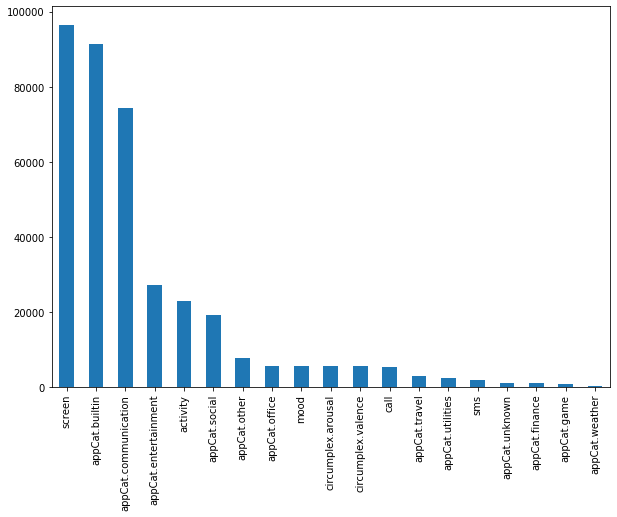

In [25]:
# Variables with most observations
pd.DataFrame(df.variable.value_counts()).plot.bar(legend=None,figsize=(10,7));

## Correlation matrices

In [26]:
# Create correlation matrices

def highest_corr(df):
    
    col = np.asarray(df.columns)
    corr_matrix = pd.DataFrame(np.nan,index = col ,columns= col ,)

    for var1 in col:
        for var2 in col:
            corr_matrix[var1][var2] = df[var1].corr(df[var2])

    abs_corr_matrix = abs(corr_matrix)

    #Sort values on correlarion with mood
    test = pd.DataFrame(abs_corr_matrix['mood'])
    sorted_list = test.sort_values(['mood'],ascending=False)
    
    return sorted_list, corr_matrix

    

In [27]:
# highest_corr(df_2)[0]
# highest_corr(df_3)[0]

NameError: name 'df_2' is not defined

## Interpolation and blockselection

In [16]:
#Create avarage/total of last five days as new feature

def df_last_3_days(df_in,all_variables):
    
    
    for v in all_variables:
        df_in[ str(v)+ '_last_3_days'] = np.nan

    count = 0
    for i in all_ids:
        count_days = 0
        for d in range(len(df_in.loc[i])):
        
            count_days +=1

            if count_days > 3:
                for var in all_variables:
                        df_new = df_in[var][count-3:count-1]
                        df_in[str(var)+ '_last_3_days'][count] = np.nanmean(df_new)
                        
            else: 
                for var in all_variables:
                    df_in[str(var)+ '_last_3_days'][count] = df_in[var][count]


            count += 1
                
    
                
    return df_in





In [17]:
count=0
for i in range(len(df_1)):
    if df_1['appCat.builtin'][i]<0:
        df_1['appCat.builtin'][i]=0
        
df_2 = block_selection(df_1)
df_2 = df_last_3_days(df_2,all_variables)


/Users/Marit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


In [18]:
# Instead of total of last k days, we now create a seperate feature for the value of each of the k days seperately
# mood is the dependent var

df_3 = pd.DataFrame(np.nan,index = index_id_date ,columns= [],)
df_3['mood'] = df_2['mood']
for v in all_variables:
    for i in range(1,6):
        df_3[ str(v)+ '_t_minus_' + str(i)] = np.nan
    
count = 0
for i in all_ids:
    count_days = 0
    for d in range(len(df_2.loc[i])):
        count_days +=1
        if count_days > 4:
            for var in all_variables:
                for i in range(1,6):
                    df_3[ str(var)+ '_t_minus_' + str(i)][count] = df_2[var][count - i]

        count += 1

## Combining app catagories

In [19]:
df_combined = block_selection(df_1)
df_combined['app.usefull'] = df_combined[['appCat.builtin', 'appCat.travel', 'appCat.utilities', 'appCat.weather']].sum(axis=1, skipna=True)
df_combined['app.leisure'] = df_combined[['appCat.entertainment', 'appCat.game', 'appCat.other', 'appCat.social', 'appCat.unknown']].sum(axis=1, skipna=True)
df_combined['app.work'] = df_combined[['appCat.finance', 'appCat.office']].sum(axis=1, skipna=True)
column_names = ['appCat.builtin','appCat.entertainment','appCat.finance','appCat.game','appCat.office','appCat.other','appCat.social','appCat.travel','appCat.unknown','appCat.utilities','appCat.weather']
df_combined = df_combined.drop(columns=column_names, axis=1)

df_combined_last_3 = df_last_3_days(df_combined,df_combined.columns)
df_combined_last_3 = df_combined_last_3.drop(columns='t_last_3_days', axis=1)


/Users/Marit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice


## Normalize data

In [20]:
min_max = MinMaxScaler()

In [21]:
# Normalization per individual 
df_to_norm_id = df_combined_last_3

# Save and remove t before norm
t_col = df_to_norm_id['t']
df_to_norm_id = df_to_norm_id.drop(columns='t', axis=1)

# MinMax scale each individual seperately 
df_to_norm_id = df_to_norm_id.fillna(0)
for i in all_ids:
    df_to_norm_id.loc[i] = min_max.fit_transform(df_to_norm_id.loc[i])
    
# Add t column after norm
df_to_norm_id['t'] = t_col

In [22]:
df_to_norm_id.to_csv('df_weekday.csv')

In [23]:
#Data not normalized
df_to_norm_tree = df_combined_last_3
index = df_combined_last_3.index

# Save and remove t before norm
t_col = df_to_norm_tree['t']
df_to_norm_tree = df_to_norm_tree.drop(columns='t', axis=1)
columns = df_to_norm_tree.columns

# MinMax scale each individual seperately 
df_to_norm_tree = df_to_norm_tree.fillna(0)
df_normalized = min_max.fit_transform(df_to_norm_tree)
    
df_normalized = pd.DataFrame(df_normalized, columns=columns, index=index)
# Add t column after norm

#df_normalized.to_csv('df_voor_tree_not_norm.csv')

## Add weekend_dummy

In [24]:
pd.options.mode.chained_assignment = None
df_to_norm_id['weekend'] = 0
days = df_to_norm_id.index.get_level_values(1).weekday
for i in range(len(df_to_norm_id)):
    if days[i] == 5 or days[i] == 6:
        df_to_norm_id['weekend'][i] = 1

        
df_combined_last_3['weekend'] = 0
days = df_combined_last_3.index.get_level_values(1).weekday
for i in range(len(df_combined_last_3)):
    if days[i] == 5 or days[i] == 6:
        df_combined_last_3['weekend'][i] = 1

        
        


In [25]:
df_normalized.to_csv('df_voor_tree_not_norm.csv')

## Benchmark predictions

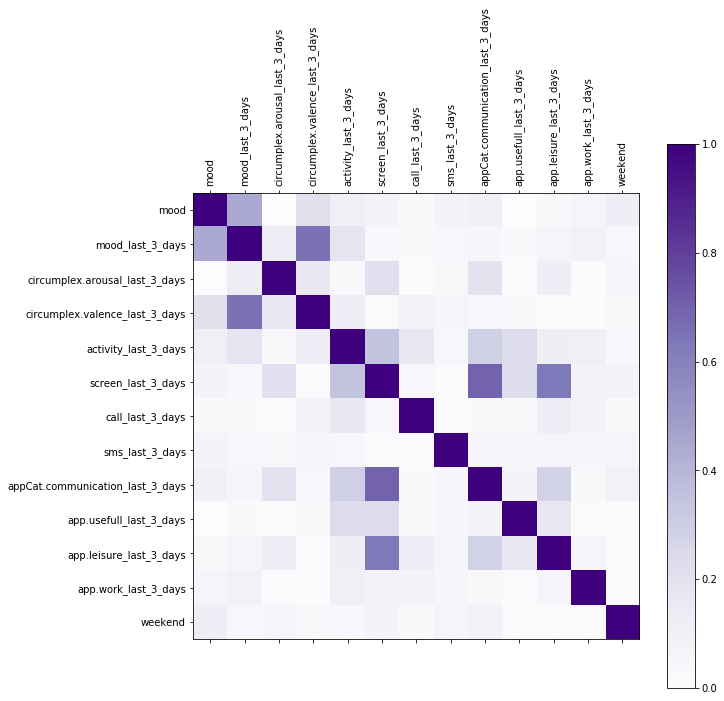

In [30]:
import matplotlib.pyplot as plt
import pylab

df_corr = df_combined_last_3
df_corr = df_corr.drop(['circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.communication', 't', 'app.usefull',
       'app.leisure', 'app.work'], axis=1)
correlations = abs(highest_corr(df_corr)[1])

names = correlations.columns
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1, cmap='Purples')
fig.colorbar(cax)
ticks = range(len(names))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,rotation='vertical')
ax.set_yticklabels(names)
plt.show()

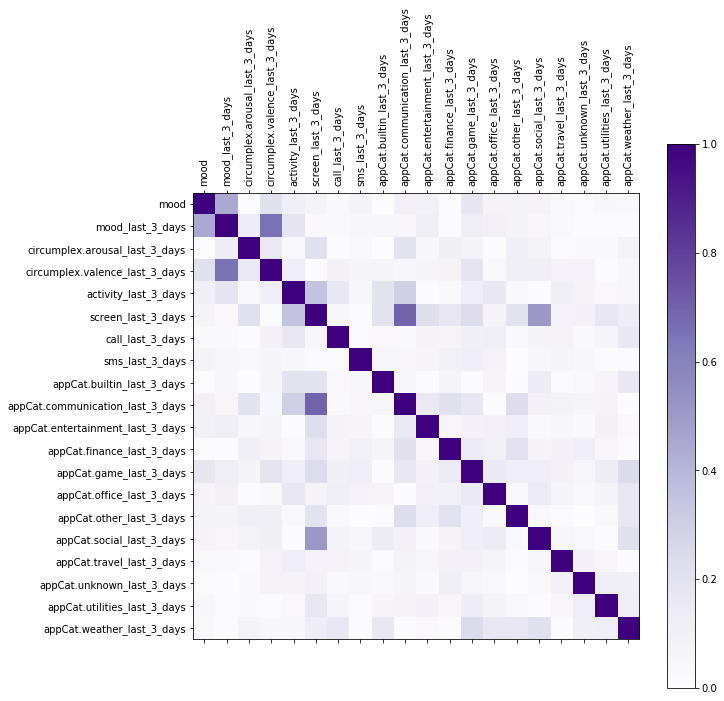

In [31]:
import matplotlib.pyplot as plt
import pylab

df_corr = df_2
df_corr = df_corr.drop(['circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather', 't'], axis=1)
correlations = abs(highest_corr(df_corr)[1])

names = correlations.columns
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1, cmap='Purples')
fig.colorbar(cax)
ticks = range(len(names))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,rotation='vertical')
ax.set_yticklabels(names)
plt.show()

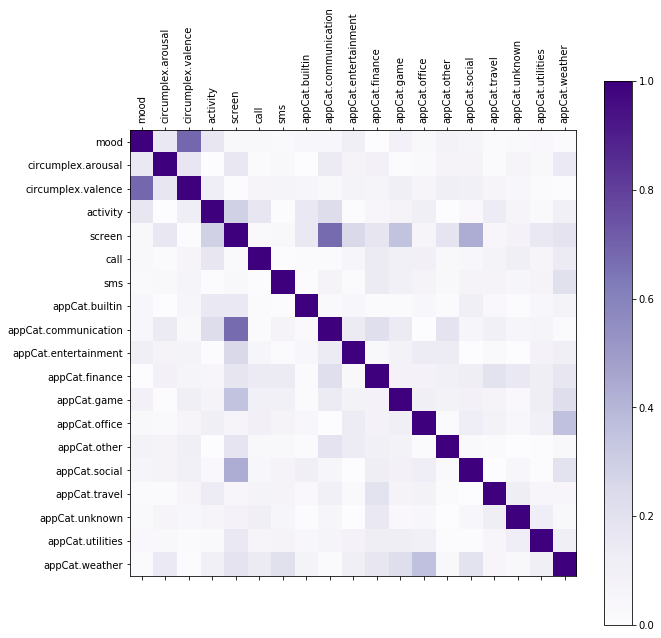

In [32]:
import matplotlib.pyplot as plt
import pylab

df_corr = df_1
df_corr = df_corr.drop(['t'], axis=1)
correlations = abs(highest_corr(df_corr)[1])

names = correlations.columns
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1, cmap='Purples')
fig.colorbar(cax)
ticks = range(len(names))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,rotation='vertical')
ax.set_yticklabels(names)
plt.show()